### 数据集

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
w,b = 1.8,2.5

In [9]:
np.random.seed(86)
x1 = np.random.rand(100) * 4
noise = np.random.randn(100)
x2 = w* x1 + b + noise

In [11]:
x = np.vstack([x1,x2]).T
x -= np.mean(x,axis = 0)
x.shape

(100, 2)

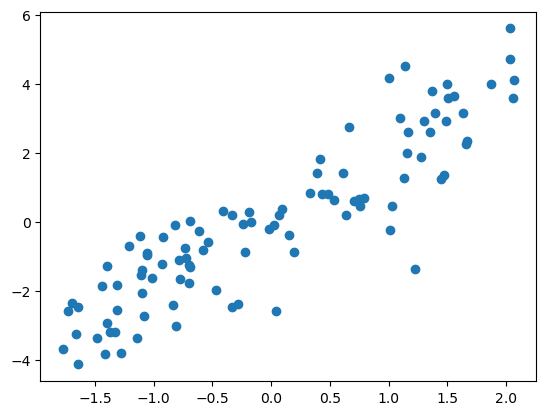

In [13]:
plt.scatter(x[:,0],x[:,1])
plt.show()

### PCA

In [16]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components = 1)
pca.fit(x)

PCA(n_components=1)

In [20]:
x_pca = pca.transform(x)
x_pca_inv = pca.inverse_transform(x_pca)

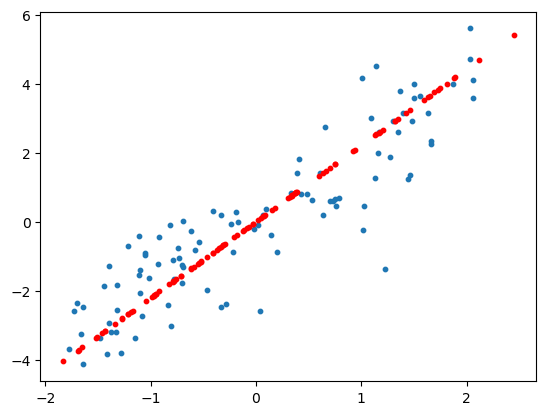

In [22]:
plt.scatter(x[:,0],x[:,1],s = 10)
plt.scatter(x_pca_inv[:,0],x_pca_inv[:,1],s = 10,c = 'r')
plt.show()

### 图形降噪

In [27]:
from sklearn.datasets import load_digits
digits = load_digits()
x = digits.data
y = digits.target

In [29]:
x.shape,y.shape

((1797, 64), (1797,))

In [41]:
def plot_top20_digits(x):
    for i in range(20):
        plt.subplot(4,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(x[i].reshape(8,8),cmap = plt.cm.gray_r,interpolation = "nearest")
    plt.show()

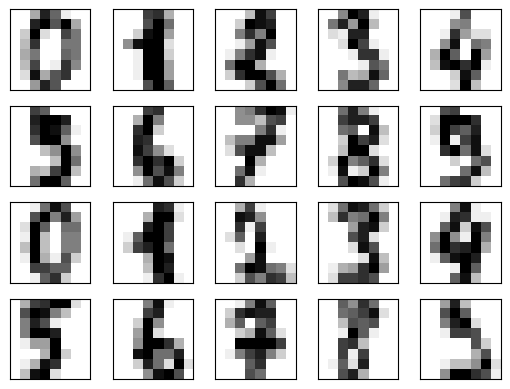

In [43]:
plot_top20_digits(x)

In [45]:
np.random.seed(86)
x_noise = x + np.random.randn(x.shape[0],x.shape[1])*3

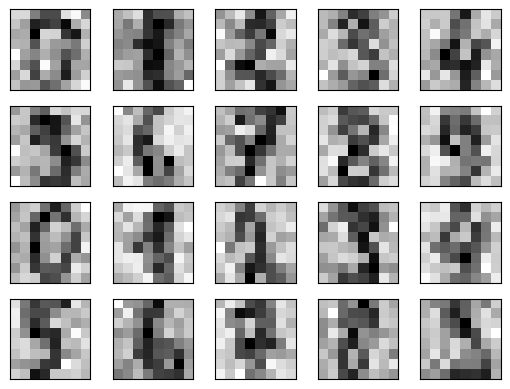

In [47]:
plot_top20_digits(x_noise)

In [49]:
pca = PCA(0.5)
pca.fit(x_noise)
x_noise_pca = pca.transform(x_noise)
x_noise_inv = pca.inverse_transform(x_noise_pca)

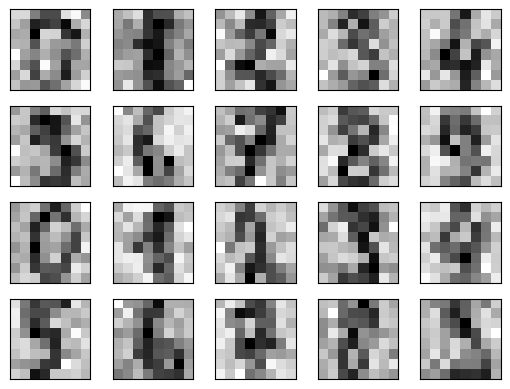

In [51]:
plot_top20_digits(x_noise)